# Wildfire Susceptibility Mapping Project

This project aims to predict wildfire susceptibility using a variety of features, applying machine learning (ML) and deep learning (DL) algorithms. The data includes geographic, topographical, climatic, and vegetation indices.

## Steps Overview

The project follows a structured approach with the following steps:

### 1. Data Preprocessing

- **One-Hot Encoding**: Categorical variables are transformed into a numerical format.
- **Normalization/Standardization**: Numerical features are scaled appropriately.

### 2. Multi-Collinearity analysis

- **VIF**: Calculate VIF for each feature to quantify the severity of multi collinearity.

### 3. Feature Importance

- Feature importance is assessed using tree-based algorithms like Random Forest.

### 3. Outlier Detection

- Outlier detection algorithms are applied to identify and handle anomalous data points.

### 5. Model Training

- ML and DL models are trained using cross-validation for robust performance assessment.

### 6. Model Evaluation

- Models are evaluated using accuracy, AUC-ROC, F1-score, and other relevant metrics.

### 7. Comparative Analysis

- The impact of outlier detection on model performance is analyzed.
- Models trained on data with and without outlier treatment are compared.

### 8. Results Interpretation and Reporting

- Results are interpreted, and conclusions are drawn regarding wildfire susceptibility.
- Detailed documentation and reporting of findings are provided.

## Dataset

The dataset includes the following features:

- Geographic coordinates (X, Y)
- Topographical features (TWI, slope, elevation, aspect)
- Vegetation index (NDVI)
- Land use (LULC)
- Proximity measures (distance to lake, road, river)
- Climatic data (temperature in July, maximum temperature, soil moisture, precipitation, evapotranspiration in August)


## Import libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

In [15]:
train = pd.read_csv('Training.csv')

In [16]:
train.head()

,OBJECTID,Fire80_Raster,X,Y,asp2,twi,tmaxjuly_2,tmax,soilmois,slope,ndvi,lulc,lake,evt_aug,elevation,road,river,pcp
0,1,1,9.778986e+05,-171014.66810,4.0,-6.0,4.0,5.0,4.0,3.0,5.0,4.0,2.0,5.0,3.0,2.0,4.0,3.0
1,2,1,9.413986e+05,-51414.66811,5.0,-46.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,2.0,4.0,3.0
2,3,1,9.470986e+05,-50814.66811,5.0,-6.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,2.0,4.0,3.0
3,4,1,2.355699e+06,-50114.66811,5.0,-6.0,3.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,1.0,0.0,5.0,4.0
4,5,1,2.349199e+06,-51214.66811,3.0,143.0,3.0,5.0,3.0,3.0,5.0,4.0,5.0,4.0,1.0,0.0,5.0,4.0


In [17]:
train['Fire80_Raster'].value_counts()

0    4768
1    4761
Name: Fire80_Raster, dtype: int64

In [18]:
test = pd.read_csv('Testing.csv')

In [19]:
test.head()

,OBJECTID,Fire_20_Raster,X,Y,asp2,twi,tmaxjuly_2,tmax,soilmois,slope,ndvi,lulc,lake,evt_aug,elevation,road,river,pcp
0,1.0,1.0,9.444328e+05,-50060.15537,2.0,129.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,2.0,4.0,3.0
1,2.0,1.0,1.104333e+06,-41060.15537,4.0,-219.0,4.0,5.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,4.0,3.0
2,3.0,1.0,2.349833e+06,-43460.15537,2.0,143.0,3.0,5.0,3.0,4.0,5.0,4.0,5.0,5.0,1.0,0.0,5.0,4.0
3,4.0,1.0,2.360533e+06,-40860.15537,3.0,143.0,3.0,5.0,3.0,3.0,5.0,4.0,5.0,5.0,1.0,1.0,5.0,4.0
4,5.0,1.0,2.353033e+06,-47360.15537,4.0,-6.0,3.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,1.0,0.0,5.0,4.0


In [20]:
test['Fire_20_Raster'].value_counts()

1.0    1201
0.0    1200
Name: Fire_20_Raster, dtype: int64

In [21]:
train.shape

(9529, 18)

In [22]:
test.shape

(3707, 18)

In [23]:
train.columns

Index(['OBJECTID', 'Fire80_Raster', 'X', 'Y', 'asp2', 'twi', 'tmaxjuly_2',
       'tmax', 'soilmois', 'slope', 'ndvi', 'lulc', 'lake', 'evt_aug',
       'elevation', 'road', 'river', 'pcp'],
      dtype='object')

In [25]:
df_train = pd.read_csv('Training.csv', names= ['OBJECTID', 'Wildfire', 'X', 'Y', 'aspect', 'twi', 'temp_july', 'temp_max', 
                                               'soilmois', 'slope', 'ndvi', 'lulc', 'dist_lake', 'evt_aug', 'elevation', 'dist_road',
                                               'dist_river', 'pcp'
                                                   ], header= 0
                      )

In [26]:
df_train.head()

,OBJECTID,Wildfire,X,Y,aspect,twi,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,dist_road,dist_river,pcp
0,1,1,9.778986e+05,-171014.66810,4.0,-6.0,4.0,5.0,4.0,3.0,5.0,4.0,2.0,5.0,3.0,2.0,4.0,3.0
1,2,1,9.413986e+05,-51414.66811,5.0,-46.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,2.0,4.0,3.0
2,3,1,9.470986e+05,-50814.66811,5.0,-6.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,2.0,4.0,3.0
3,4,1,2.355699e+06,-50114.66811,5.0,-6.0,3.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,1.0,0.0,5.0,4.0
4,5,1,2.349199e+06,-51214.66811,3.0,143.0,3.0,5.0,3.0,3.0,5.0,4.0,5.0,4.0,1.0,0.0,5.0,4.0


In [27]:
df_test = pd.read_csv('Testing.csv', names= ['OBJECTID', 'Wildfire', 'X', 'Y', 'aspect', 'twi', 'temp_july', 'temp_max', 
                                             'soilmois', 'slope', 'ndvi', 'lulc', 'dist_lake', 'evt_aug', 'elevation', 'dist_road',
                                             'dist_river', 'pcp'
                                                   ], header= 0
                      )

In [28]:
df_test.head()

,OBJECTID,Wildfire,X,Y,aspect,twi,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,dist_road,dist_river,pcp
0,1.0,1.0,9.444328e+05,-50060.15537,2.0,129.0,4.0,5.0,3.0,2.0,5.0,4.0,4.0,5.0,3.0,2.0,4.0,3.0
1,2.0,1.0,1.104333e+06,-41060.15537,4.0,-219.0,4.0,5.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,4.0,3.0
2,3.0,1.0,2.349833e+06,-43460.15537,2.0,143.0,3.0,5.0,3.0,4.0,5.0,4.0,5.0,5.0,1.0,0.0,5.0,4.0
3,4.0,1.0,2.360533e+06,-40860.15537,3.0,143.0,3.0,5.0,3.0,3.0,5.0,4.0,5.0,5.0,1.0,1.0,5.0,4.0
4,5.0,1.0,2.353033e+06,-47360.15537,4.0,-6.0,3.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,1.0,0.0,5.0,4.0


In [29]:
df_train = df_train.astype(
    {
        'Wildfire': 'category',
        'aspect': 'category',
        'temp_july': 'category',
        'temp_max': 'category',
        'soilmois': 'category',
        'slope': 'category',
        'ndvi': 'category',
        'lulc': 'category',
        'dist_lake': 'category',
        'evt_aug': 'category',
        'elevation': 'category',
        'dist_road': 'category',
        'dist_river': 'category',
        'pcp': 'category',
    }
)

In [30]:
df_test = df_test.astype(
    {
        'Wildfire': 'category',
        'aspect': 'category',
        'temp_july': 'category',
        'temp_max': 'category',
        'soilmois': 'category',
        'slope': 'category',
        'ndvi': 'category',
        'lulc': 'category',
        'dist_lake': 'category',
        'evt_aug': 'category',
        'elevation': 'category',
        'dist_road': 'category',
        'dist_river': 'category',
        'pcp': 'category',
    }
)

In [31]:
df_train[df_train.isnull().any(axis= 1)]

,OBJECTID,Wildfire,X,Y,aspect,twi,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,dist_road,dist_river,pcp
4912,4913,0,1.067970e+06,-3.218339e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5257,5258,0,1.667470e+06,-8.523389e+04,NaN,NaN,5.0,5.0,2.0,NaN,3.0,1.0,4.0,5.0,NaN,0.0,2.0,3.0
5339,5340,0,4.469699e+05,-2.383389e+04,3.0,-219.0,NaN,5.0,3.0,4.0,4.0,4.0,1.0,5.0,3.0,0.0,3.0,2.0
5882,5883,0,2.236370e+06,2.618661e+05,NaN,NaN,5.0,5.0,3.0,NaN,5.0,4.0,5.0,5.0,NaN,1.0,5.0,4.0
6110,6111,0,2.395070e+06,3.294661e+05,NaN,NaN,4.0,5.0,4.0,NaN,4.0,11.0,5.0,5.0,NaN,1.0,5.0,4.0
6169,6170,0,2.041270e+06,3.475661e+05,NaN,NaN,NaN,5.0,2.0,NaN,4.0,NaN,NaN,NaN,NaN,0.0,5.0,3.0
6271,6272,0,2.443470e+06,3.548661e+05,4.0,143.0,NaN,NaN,NaN,3.0,4.0,4.0,5.0,5.0,1.0,2.0,5.0,NaN
6954,6955,0,2.942770e+06,7.680661e+05,NaN,NaN,2.0,5.0,2.0,NaN,5.0,11.0,5.0,4.0,NaN,2.0,5.0,4.0
7115,7116,0,2.861370e+06,8.542661e+05,NaN,NaN,3.0,5.0,2.0,NaN,5.0,3.0,5.0,4.0,NaN,0.0,5.0,4.0
7170,7171,0,2.829970e+06,8.940661e+05,NaN,NaN,4.0,5.0,3.0,NaN,5.0,4.0,5.0,4.0,NaN,0.0,4.0,4.0


In [32]:
df_test[df_test.isnull().any(axis =1)]

,OBJECTID,Wildfire,X,Y,aspect,twi,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,dist_road,dist_river,pcp
1329,1330.0,0.0,1670876.864,-8.872665e+04,NaN,NaN,5.0,5.0,2.0,NaN,3.0,11.0,4.0,5.0,NaN,1.0,1.0,3.0
2368,2369.0,0.0,-1496323.136,2.653873e+06,NaN,NaN,1.0,1.0,1.0,NaN,2.0,11.0,5.0,2.0,NaN,4.0,3.0,1.0
2401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
New_df_train = df_train.dropna()

In [34]:
New_df_test = df_test.dropna()

In [35]:
New_df_train[New_df_train.isnull().any(axis =1)]

,OBJECTID,Wildfire,X,Y,aspect,twi,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,dist_road,dist_river,pcp


In [37]:
New_df_test[New_df_test.isnull().any(axis =1)]

,OBJECTID,Wildfire,X,Y,aspect,twi,temp_july,temp_max,soilmois,slope,ndvi,lulc,dist_lake,evt_aug,elevation,dist_road,dist_river,pcp


In [38]:
New_df_train.shape

(9514, 18)

In [39]:
df_train.shape

(9529, 18)

In [40]:
New_df_test.shape

(2399, 18)

In [41]:
df_test.shape

(3707, 18)

In [42]:
New_df_train['Wildfire'].value_counts()

1    4761
0    4753
Name: Wildfire, dtype: int64

In [44]:
df_train['Wildfire'].value_counts()

0    4768
1    4761
Name: Wildfire, dtype: int64

In [43]:
New_df_test['Wildfire'].value_counts()

1.0    1201
0.0    1198
Name: Wildfire, dtype: int64

In [45]:
df_test['Wildfire'].value_counts()

1.0    1201
0.0    1200
Name: Wildfire, dtype: int64

In [47]:
New_df_train.columns

Index(['OBJECTID', 'Wildfire', 'X', 'Y', 'aspect', 'twi', 'temp_july',
       'temp_max', 'soilmois', 'slope', 'ndvi', 'lulc', 'dist_lake', 'evt_aug',
       'elevation', 'dist_road', 'dist_river', 'pcp'],
      dtype='object')

In [49]:
columns_to_drop = ['OBJECTID']
New_df_train = New_df_train.drop(columns= columns_to_drop)
New_df_test = New_df_test.drop(columns= columns_to_drop)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(df):

    vifs = [variance_inflation_factor(New_df_train.values, i) for i in range(New_df_train.shape[1])]
    tolerance = [1/vif for vif in vifs]

    vif_data = pd.DataFrame(index=New_df_train.columns)
    vif_data['VIF'] = vifs
    vif_data['Tolerance'] = tolerance

    return vif_data

# Calculate VIF
vif_data = calculate_vif(New_df_train)

print(vif_data)


                  VIF  Tolerance
Wildfire     3.677781   0.271903
X            3.276505   0.305203
Y           15.963957   0.062641
aspect       8.936499   0.111901
twi          1.474814   0.678052
temp_july   25.104022   0.039834
temp_max    52.512773   0.019043
soilmois     9.498945   0.105275
slope       16.946471   0.059009
ndvi        19.809979   0.050480
lulc         8.281548   0.120750
dist_lake   19.014767   0.052591
evt_aug     36.170058   0.027647
elevation   19.594277   0.051035
dist_road   11.113297   0.089982
dist_river  21.056229   0.047492
pcp         18.572630   0.053843


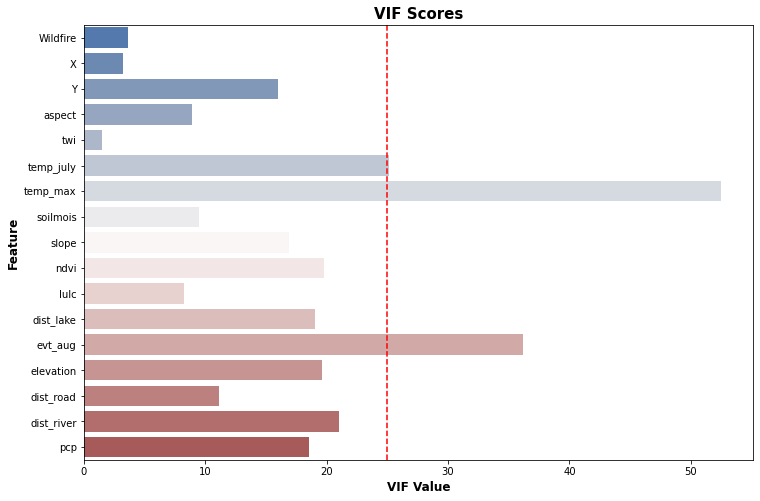

In [51]:
def plot_vif(vif_data):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 8))

    # Plot the VIF values
    sns.barplot(x=vif_data['VIF'], y=vif_data.index, palette="vlag", ax=ax)
    ax.axvline(x=25, color="red", linestyle="--")  # Add a vertical line at VIF = 30
    ax.set_title('VIF Scores', fontweight='bold', fontsize=15)
    ax.set_xlabel('VIF Value', fontweight='bold', fontsize=12)
    ax.set_ylabel('Feature', fontweight='bold', fontsize=12)

    # Display the plot
    plt.show()

plot_vif(vif_data)

In [53]:
New_df_train.columns

Index(['Wildfire', 'X', 'Y', 'aspect', 'twi', 'temp_july', 'temp_max',
       'soilmois', 'slope', 'ndvi', 'lulc', 'dist_lake', 'evt_aug',
       'elevation', 'dist_road', 'dist_river', 'pcp'],
      dtype='object')

In [56]:
from sklearn.ensemble import RandomForestClassifier
# Create the feature matrix X and the target variable y

X = New_df_train[
    [
     #'X', 'Y', 
     'aspect', 'twi', 'temp_july', 'temp_max', 'soilmois', 'slope', 'ndvi', 'lulc',
     'lulc', 'dist_lake', 'evt_aug', 'elevation', 'dist_road', 'dist_road', 'dist_river', 'pcp']
]
y = New_df_train['Wildfire']

# Initialize the random forest classifier
rf = RandomForestClassifier()

# Fit the classifier to the data
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Calculate the sum of importances
total_importance = feature_importance['Importance'].sum()

# Calculate the weights by dividing each importance by the total importance
feature_importance['Weight'] = feature_importance['Importance'] / total_importance

# Sort the DataFrame by importance in descending order
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Print the feature importances with weights
print(feature_importance)


       Feature  Importance    Weight
6         ndvi    0.144664  0.144664
3     temp_max    0.122010  0.122010
10     evt_aug    0.108927  0.108927
8         lulc    0.107561  0.107561
7         lulc    0.100044  0.100044
2    temp_july    0.062968  0.062968
15         pcp    0.055252  0.055252
11   elevation    0.048619  0.048619
12   dist_road    0.045049  0.045049
13   dist_road    0.043567  0.043567
4     soilmois    0.034010  0.034010
9    dist_lake    0.031102  0.031102
14  dist_river    0.029212  0.029212
5        slope    0.025416  0.025416
0       aspect    0.023399  0.023399
1          twi    0.018199  0.018199


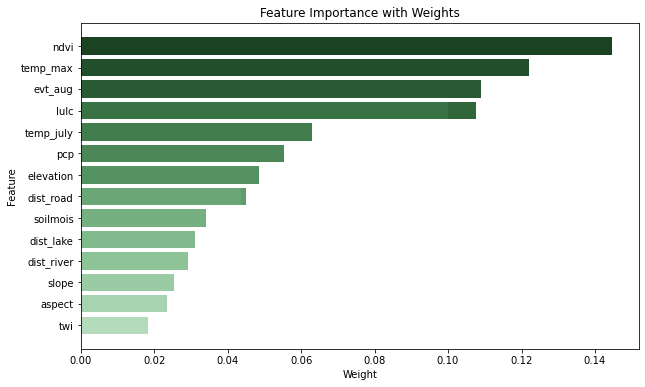

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the color palette
palette = sns.cubehelix_palette(len(feature_importance['Feature']), start=2, rot=0, dark=0.2, light=0.8, reverse=True)

# Create a graph
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance['Feature'], feature_importance['Weight'], color=palette)
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Feature Importance with Weights')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization

# Show the graph
plt.show()

In [58]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data 'TWI' and transform it
twi_train = New_df_train['twi'].values.reshape(-1, 1)
twi_scaled_train = scaler.fit_transform(twi_train)
New_df_train['twi'] = twi_scaled_train.flatten()

# Use the already fitted scaler to transform the test data 'TWI'
twi_test = New_df_test['twi'].values.reshape(-1, 1)
twi_scaled_test = scaler.transform(twi_test)  # Note the use of transform() instead of fit_transform()
New_df_test['twi'] = twi_scaled_test.flatten()

### Scenario 1: we do not consider TWI, evt_aug, temp_july

In [60]:
columns_to_drop = [
    'twi', 'evt_aug', 'temp_july'
    ]
New_df_train2 = New_df_train.drop(columns = columns_to_drop)

In [61]:
New_df_train2.columns

Index(['Wildfire', 'X', 'Y', 'aspect', 'temp_max', 'soilmois', 'slope', 'ndvi',
       'lulc', 'dist_lake', 'elevation', 'dist_road', 'dist_river', 'pcp'],
      dtype='object')

In [63]:
New_df_test2 = New_df_test.drop(columns = columns_to_drop)

In [64]:
New_df_test2.columns

Index(['Wildfire', 'X', 'Y', 'aspect', 'temp_max', 'soilmois', 'slope', 'ndvi',
       'lulc', 'dist_lake', 'elevation', 'dist_road', 'dist_river', 'pcp'],
      dtype='object')

In [65]:
from sklearn.preprocessing import OneHotEncoder

# Define the categorical columns to be encoded
categorical_columns = [
    'aspect', 'temp_max', 'soilmois', 'slope', 'ndvi', 'lulc',
    'dist_lake', 'elevation', 'dist_road', 'dist_river', 'pcp'
]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit the encoder and transform the training data
encoded_train = encoder.fit_transform(New_df_train2[categorical_columns])
encoded_test = encoder.transform(New_df_test2[categorical_columns])

# Convert the encoded features into a DataFrame
encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_columns))
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded features with 'X', 'Y', and 'Wildfire'
final_train_df = pd.concat([
    New_df_train2[['X', 'Y', 'Wildfire']].reset_index(drop=True),
    encoded_train_df.reset_index(drop=True)
], axis=1)

final_test_df = pd.concat([
    New_df_test2[['X', 'Y', 'Wildfire']].reset_index(drop=True),
    encoded_test_df.reset_index(drop=True)
], axis=1)

# Now final_train_df and final_test_df are ready for machine learning model training


In [66]:
from sklearn.ensemble import RandomForestClassifier

# Prepare the feature matrix and target vector for training
X_train = final_train_df.drop(['Wildfire', 'X', 'Y'], axis=1)
y_train = final_train_df['Wildfire']

# Prepare the feature matrix and target vector for testing
X_test = final_test_df.drop(['Wildfire', 'X', 'Y'], axis=1)
y_test = final_test_df['Wildfire']

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = rf_model.score(X_test, y_test)
print(f'Random Forest accuracy: {accuracy:.2%}')


Random Forest accuracy: 94.71%


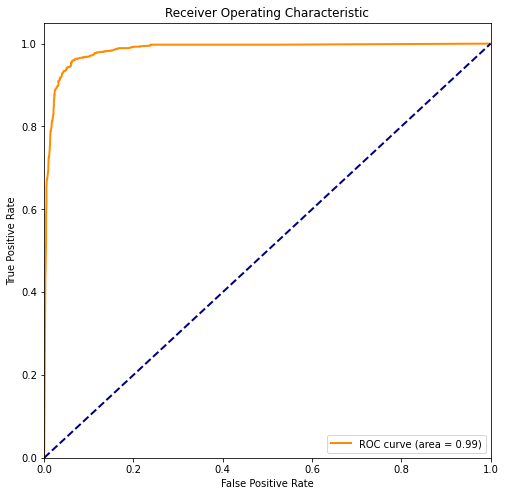

AUC: 0.99


In [67]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test data
y_probs = rf_model.predict_proba(X_test)[:, 1]  # We are interested in the probabilities of the positive class

# Calculate ROC curve from y_test and the probability predictions
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print the AUC
print(f'AUC: {roc_auc:.2f}')


In [68]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ANN Input Dimension
input_dim = X_train.shape[1]

# Define the ANN Model
ann_model = Sequential()
ann_model.add(Dense(128, input_dim=input_dim, activation='relu'))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the ANN Model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN Model
ann_history = ann_model.fit(X_train, y_train, epochs=45, batch_size=32, validation_split=0.2)

# Evaluate the ANN Model on Test Data
ann_loss, ann_accuracy = ann_model.evaluate(X_test, y_test)
print(f'ANN Test Accuracy: {ann_accuracy:.2f}')

2024-04-27 20:58:47.602929: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-27 20:58:47.867818: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-27 20:59:05.688007: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/ashimashi/anaconda3/lib/python3.9/site-packages/numpy/core/getlimits.py:542: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
/home/ashimashi/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object

ValueError: Invalid dtype: category

In [ ]:
# Predict probabilities for the test set
y_probs = ann_model.predict(X_test)

# Keep probabilities for the positive outcome only
y_pred = y_probs[:, 0] if len(y_probs.shape) > 1 else y_probs

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# CNN expects an extra dimension for channels - reshaping the data
X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the CNN Model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_dim, 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the CNN Model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN Model
cnn_history = cnn_model.fit(X_train_reshaped, y_train, epochs=70, batch_size=32, validation_split=0.2)

# Evaluate the CNN Model on Test Data
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped, y_test)
print(f'CNN Test Accuracy: {cnn_accuracy:.2f}')


In [ ]:
# Predict probabilities for the test set using the reshaped test data
y_probs_cnn = cnn_model.predict(X_test_reshaped)

# Keep probabilities for the positive outcome only
y_pred_cnn = y_probs_cnn[:, 0] if len(y_probs_cnn.shape) > 1 else y_probs_cnn

# Compute ROC curve and AUC
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, y_pred_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

# Plot ROC curve
plt.figure()
plt.plot(fpr_cnn, tpr_cnn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_cnn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for CNN')
plt.legend(loc="lower right")
plt.show()
